# Historical Returns Distribution fitting

## Normal or not

Before using the Volatility infered from the log-returns normality assumption, it is worth looking into the validity of that assumption.



In [188]:

{
    "tags": [
        "hide_input",
    ]
}

import math

import pandas as pd
# import pandas.io.sql as sqlio

import numpy as np
from numpy.random import default_rng
np.set_printoptions(precision=5, suppress=True)

import matplotlib as mpl
import matplotlib.pyplot as plt

import scipy as scipy

import psycopg2

# import seaborn as sns

from math import log, sqrt, exp, pi
from scipy.stats import norm, laplace, t as student_t

plt.style.use('seaborn')
plt.colormaps
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

btcusd_1min = pd.read_csv("./BTCUSD.csv", sep=",", header=0, names=["date","open","high","low","close"], index_col="date")

btcusd_1min['ret_2min'] = np.log(btcusd_1min['close'] / btcusd_1min['close'].shift(2))

vol_2min = btcusd_1min['ret_2min'].std()

# number of 2-minute per year
nb_2min_per_year = 60/2 * 24 * 365.25
vol_ann = vol_2min * sqrt(nb_2min_per_year)


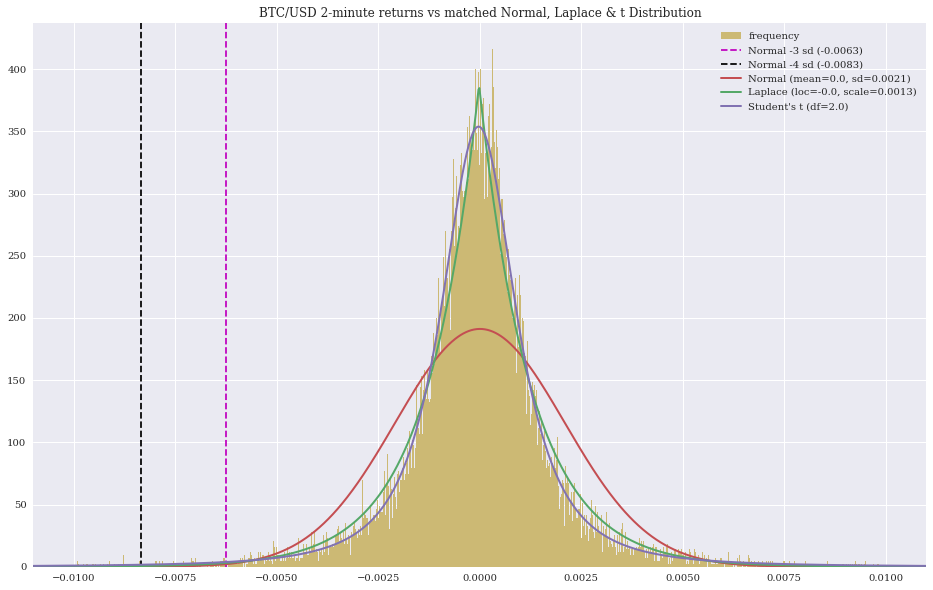

In [189]:

# nb_2min_in_30d = 30*24*60/2 # = 21600
ret_2min = btcusd_1min['ret_2min'][-21600:]
# ret_2min = btcusd_1min['ret_2min'][2:]

mean = ret_2min.mean()
std = ret_2min.std()

plt.figure(figsize=(16, 10))
plt.title("BTC/USD 2-minute returns vs matched Normal, Laplace & t Distribution")
plt.hist(ret_2min, color='C4', bins=1000, label='frequency', align='mid', density=True, range=[-0.01,0.01]);
# plt.axvline(mean + 4 * std, color='k', label='Normal +4 sd', linestyle='--')
plt.axvline(mean - 3 * std, color='m', label=f'Normal -3 sd ({(mean - 3 * std).round(4)})', linestyle='--')
plt.axvline(mean - 4 * std, color='k', label=f'Normal -4 sd ({(mean - 4 * std).round(4)})', linestyle='--')

#  Plot the Normal PDF.
m,s = norm.fit(ret_2min)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, m, s)
plt.plot(x, p, color='C2', linewidth=2, scalex=False, scaley=False, label=f"Normal (mean={m.round(4)}, sd={s.round(4)})")

#  Plot the Laplace PDF.
loc,scale = laplace.fit(ret_2min)
l = laplace.pdf(x, loc, scale)
plt.plot(x, l, color='C1', linewidth=2, scalex=False, scaley=False, label=f"Laplace (loc={loc.round(4)}, scale={scale.round(4)})")

#  Plot the student-t PDF.
df, tloc, tscale = student_t.fit(ret_2min)
t = student_t.pdf(x, df, tloc, tscale)
plt.plot(x, t, color='C3', linewidth=2, scalex=False, scaley=False, label=f"Student's t (df={df.round(2)})")

plt.legend(loc="best");
plt.show()

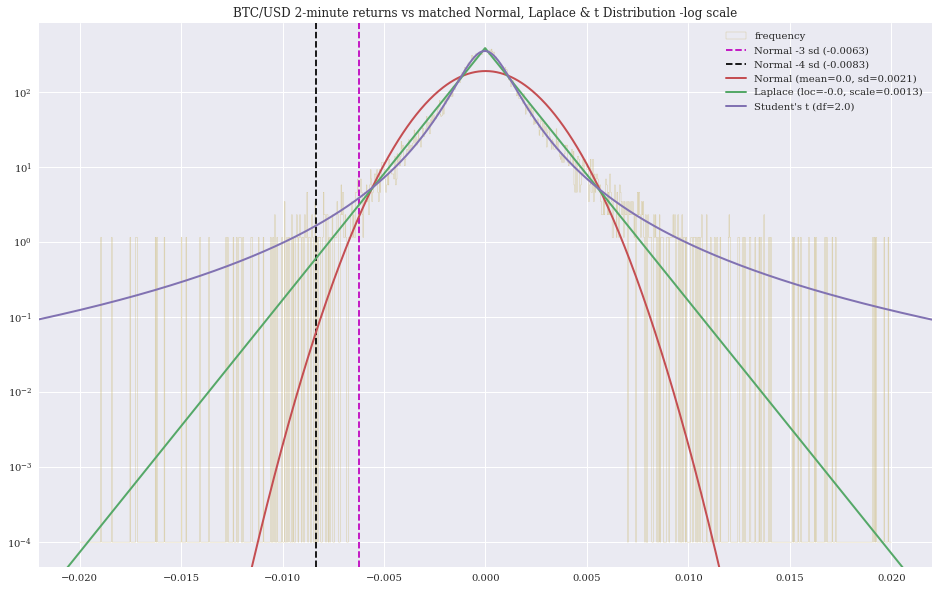

In [190]:

# nb_2min_in_30d = 30*24*60/2 # = 21600
ret_2min = btcusd_1min['ret_2min'][-21600:]
# ret_2min = btcusd_1min['ret_2min'][2:]

mean = ret_2min.mean()
std = ret_2min.std()

plt.figure(figsize=(16, 10))
plt.title("BTC/USD 2-minute returns vs matched Normal, Laplace & t Distribution -log scale")
plt.hist(ret_2min, color='C4', bins=1000, label='frequency', align='mid', density=True, range=[-0.02,0.02], log=True, bottom=0.0001, histtype='step');
# plt.hist(ret_2min, color='darkgrey', bins=1000, label='frequency', align='mid', density=True, range=[-0.02,0.02], log=True, bottom=0.0001, histtype='step');
# plt.axvline(mean + 4 * std, color='k', label='Normal +4 sd', linestyle='--')
plt.axvline(mean - 3 * std, color='m', label=f'Normal -3 sd ({(mean - 3 * std).round(4)})', linestyle='--')
plt.axvline(mean - 4 * std, color='k', label=f'Normal -4 sd ({(mean - 4 * std).round(4)})', linestyle='--')

#  Plot the Normal PDF.
m,s = norm.fit(ret_2min)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, m, s)
plt.plot(x, p, color='C2', linewidth=2, scalex=False, scaley=False, label=f"Normal (mean={m.round(4)}, sd={s.round(4)})")

#  Plot the Laplace PDF.
loc,scale = laplace.fit(ret_2min)
l = laplace.pdf(x, loc, scale)
plt.plot(x, l, color='C1', linewidth=2, scalex=False, scaley=False, label=f"Laplace (loc={loc.round(4)}, scale={scale.round(4)})")

#  Plot the student-t PDF.
df, tloc, tscale = student_t.fit(ret_2min)
t = student_t.pdf(x, df, tloc, tscale)
plt.plot(x, t, color='C3', linewidth=2, scalex=False, scaley=False, label=f"Student's t (df={df.round(2)})")

plt.legend(loc='best');
plt.show()

## Normal Distribution


## Laplace Distribution

## Lookback at the sigma levels